## **导入库**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data  = pd.read_csv('Bird_strikes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

In [5]:
# Check for missing data
missing_df = data.isnull().sum().rename('missing').reset_index()
missing_df['missing_percentage'] = missing_df['missing']/data.shape[0]*100
missing_df[missing_df['missing']>0].style.background_gradient()

,index,missing,missing_percentage
7,Effect,23351,91.828228
10,Engines,234,0.920209
12,OriginState,449,1.765701
14,ConditionsPrecipitation,23414,92.075976
17,Remarks,4761,18.722718


In [6]:
# Dropping unnecessary features
data.drop(['RecordID','AltitudeBin','NumberStruck','Effect','ConditionsPrecipitation','AircraftType','Remarks'],axis=1,inplace=True)

# Correcting data types
data.FlightDate = pd.DatetimeIndex(data.FlightDate)
data.Cost = data.Cost.str.replace(',','')
data.Cost = data.Cost.astype(float)
data.Engines = data.Engines.replace('C','2')
data.Engines = data.Engines.fillna(int(data.Engines.mode())).astype(int)
data.OriginState.fillna('NA',inplace=True)
data.FlightPhase = data.FlightPhase.replace({'Descent':'Others','Taxi':'Others','Parked':'Others'})

In [7]:
data.describe().style.background_gradient()

,NumberStruckActual,FlightDate,Engines,Cost,Altitude,PeopleInjured
count,25429.000000,25429,25429.000000,25429.000000,25429.000000,25429.000000
mean,2.699634,2007-01-22 13:20:40.017303040,2.003933,5566.368241,799.028432,0.000826
min,1.000000,2000-01-02 00:00:00,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2004-06-17 00:00:00,2.000000,0.000000,0.000000,0.000000
50%,1.000000,2007-07-29 00:00:00,2.000000,0.000000,50.000000,0.000000
75%,1.000000,2009-11-01 00:00:00,2.000000,0.000000,700.000000,0.000000
max,942.000000,2011-12-31 00:00:00,4.000000,12397751.000000,18000.000000,6.000000
std,12.825804,nan,0.363270,122238.789137,1740.079843,0.047339


In [8]:
data.describe(include='O')

,AirportName,MakeModel,Damage,Operator,OriginState,FlightPhase,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,IsAircraftLarge?
count,25429,25429,25429,25429,25429,25429,25429,25429,25429,25429,25429
unique,1109,324,2,292,61,5,3,3,345,2,2
top,DALLAS/FORT WORTH INTL ARPT,B-737-700,No damage,SOUTHWEST AIRLINES,California,Approach,Small,No Cloud,Unknown bird - small,N,No
freq,803,2488,22975,4628,2499,10382,17412,12575,10436,14567,17027


# **数据分析**

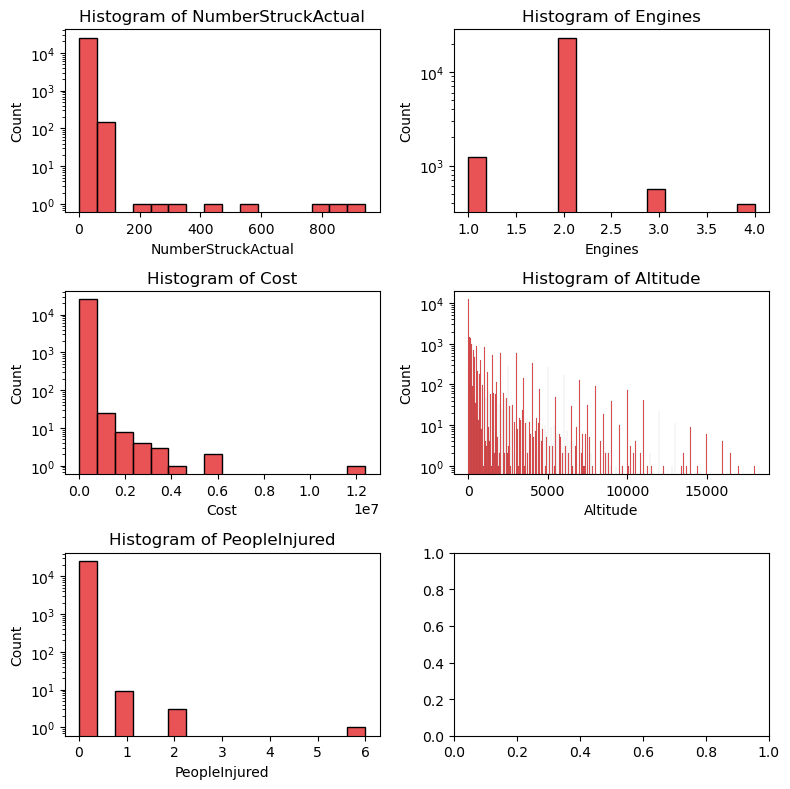

In [9]:
sns.set_palette('Set1')
fig,ax = plt.subplots(3,2,figsize=(8,8))
ax = ax.flatten()

for i,feat in enumerate(data.select_dtypes(include='number').columns):
    sns.histplot(data[feat], ax=ax[i])
    ax[i].set_yscale('log') # Set logarithmic scale on x-axis
    ax[i].set_title(f"Histogram of {feat}")

plt.tight_layout()
plt.savefig('D:\\python\\HomeWork\\图1.png')
plt.show()    

## **趋势**

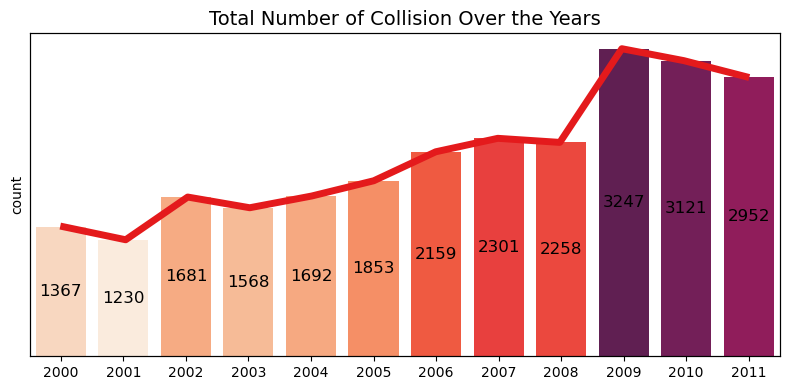

In [10]:
cmap = cm.get_cmap('rocket_r')
fig,ax = plt.subplots(figsize=(8,4))

agg_data = data.FlightDate.dt.year.value_counts()
norm = plt.Normalize(agg_data.min(), agg_data.max())
bars = sns.barplot(x=agg_data.index,y=agg_data,ax=ax,)
bars.bar_label(bars.containers[0], fontsize=12,label_type='center')

for bar in bars.patches:
    height = bar.get_height()
    bar.set_facecolor(cmap(norm(height)*0.75))

ax2 = ax.twiny()
sns.lineplot(x=agg_data.index,y=agg_data,ax=ax2,linewidth=5,palette='b')
plt.title('Total Number of Collision Over the Years',fontsize=14)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('')
plt.xlabel('')

plt.tight_layout()
plt.savefig('D:\\python\\HomeWork\\图2.png')
plt.show()   

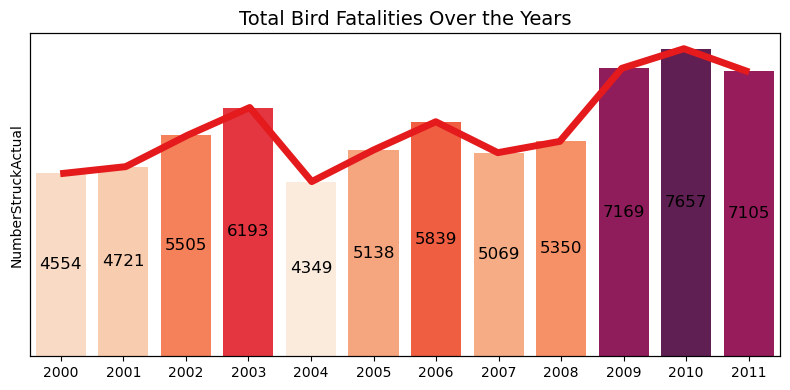

In [11]:
fig,ax = plt.subplots(figsize=(8,4))

agg_data = data.groupby(data.FlightDate.dt.year)['NumberStruckActual'].sum()
norm = plt.Normalize(agg_data.min(), agg_data.max())
bars = sns.barplot(x=agg_data.index,y=agg_data,ax=ax,)
bars.bar_label(bars.containers[0], fontsize=12,label_type='center')

for bar in bars.patches:
    height = bar.get_height()
    bar.set_facecolor(cmap(norm(height)*0.75))
    
ax2 = ax.twiny()
sns.lineplot(x=agg_data.index,y=agg_data, ax=ax2,linewidth=5)
plt.title('Total Bird Fatalities Over the Years',fontsize=14)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('')
plt.xlabel('')

plt.tight_layout()
plt.savefig('D:\\python\\HomeWork\\图3.png')
plt.show()   

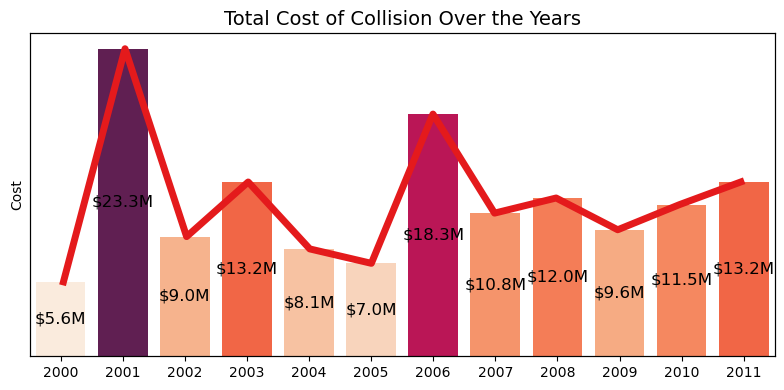

In [12]:
fig,ax = plt.subplots(figsize=(8,4))

agg_data = data.groupby(data.FlightDate.dt.year)['Cost'].sum()
norm = plt.Normalize(agg_data.min(), agg_data.max())
bars = sns.barplot(x=agg_data.index,y=agg_data,ax=ax,)
bars.bar_label(bars.containers[0], fontsize=12,label_type='center',labels=[f'${x/1e6:.1f}M' for x in agg_data])
for bar in bars.patches:
    height = bar.get_height()
    bar.set_facecolor(cmap(norm(height)*0.75))

ax2 = ax.twiny()
sns.lineplot(x=agg_data.index,y=agg_data, ax=ax2,linewidth=5)
plt.title('Total Cost of Collision Over the Years',fontsize=14)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('')
plt.xlabel('')

plt.tight_layout()
plt.savefig('D:\\python\\HomeWork\\图4.png')
plt.show()   

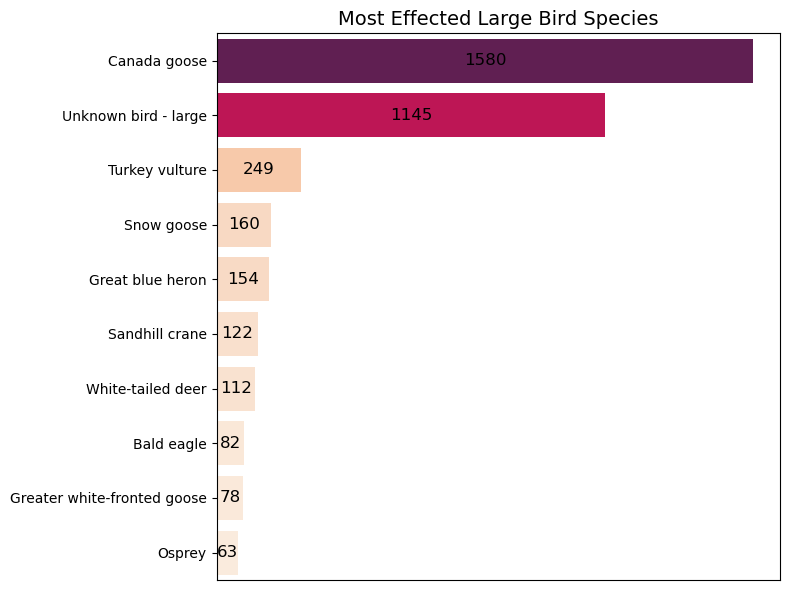

In [36]:
fig,ax = plt.subplots(figsize=(8,6))

agg_data = data[data.WildlifeSize=='Large'].groupby('WildlifeSpecies')['NumberStruckActual'].sum().sort_values(ascending=False)[:10]
norm = plt.Normalize(agg_data.min(), agg_data.max())
bars = sns.barplot(y=agg_data.index,x=agg_data,ax=ax,orient='h')
bars.bar_label(bars.containers[0], fontsize=12,label_type='center')

for bar in bars.patches:
    width = bar.get_width()
    bar.set_facecolor(cmap(norm(width)*0.75))

plt.title('Most Effected Large Bird Species',fontsize=14)
plt.xticks([])
plt.ylabel('')
plt.xlabel('')


plt.tight_layout()
plt.savefig('D:\\python\\HomeWork\\图5.png')
plt.show()   

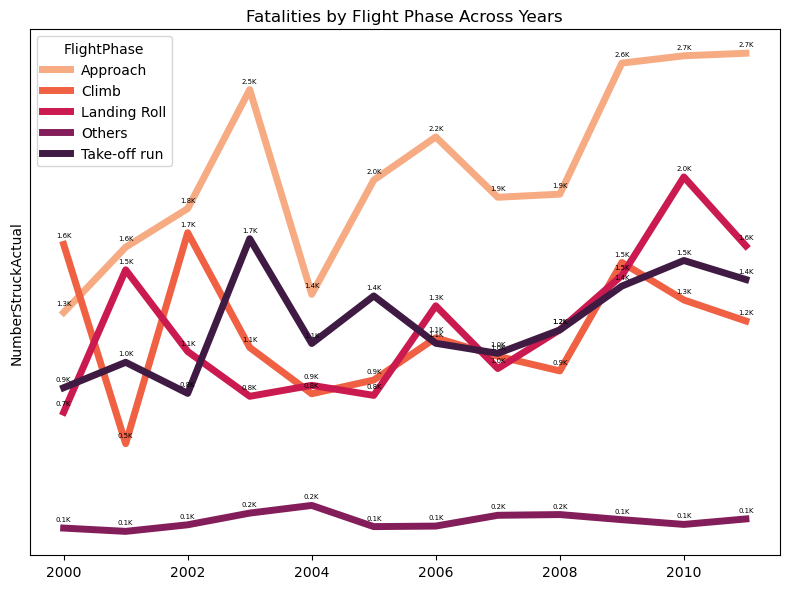

In [37]:
fig,ax = plt.subplots(figsize=(8,6))

agg_data = data.groupby([data.FlightDate.dt.year,'FlightPhase'])['NumberStruckActual'].sum().reset_index()
lines = sns.lineplot(x=agg_data['FlightDate'],y=agg_data['NumberStruckActual'],hue=agg_data['FlightPhase'],ax=ax,linewidth=5,palette='rocket_r')

for line in lines.lines:  
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{y/1e3:.1f}K', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=5, color='black')

plt.title('Fatalities by Flight Phase Across Years',fontsize=12)
plt.yticks([])
plt.xlabel('')

plt.tight_layout()
plt.savefig('D:\\python\\HomeWork\\图6.png')
plt.show()   

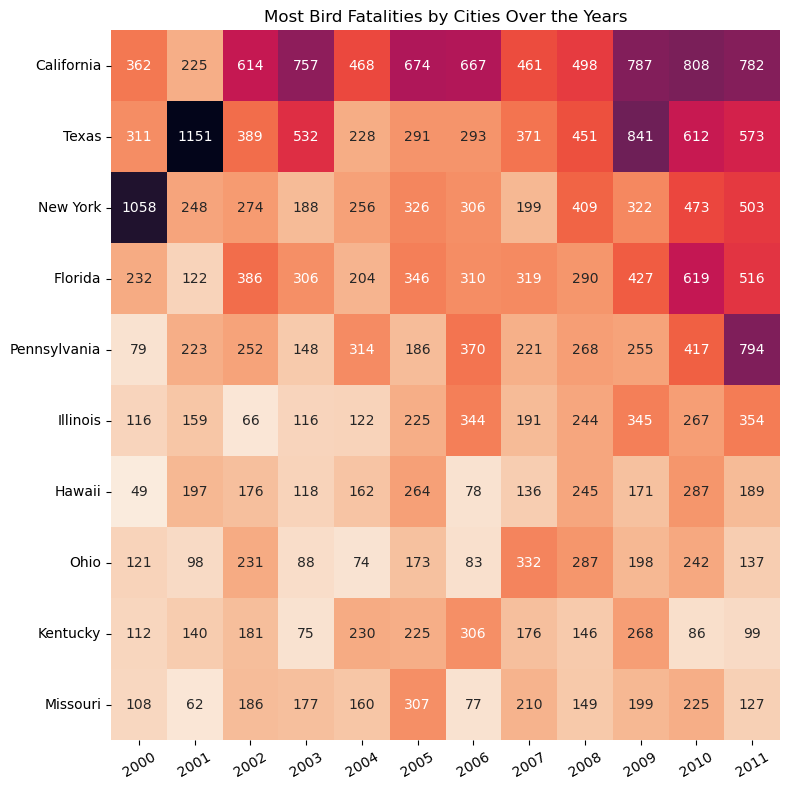

In [38]:
fig,ax = plt.subplots(figsize=(8,8))

agg_data = data.groupby(['OriginState',data.FlightDate.dt.year])['NumberStruckActual'].sum().unstack()
idx = agg_data.sum(axis=1).sort_values(ascending=False).index[:10]
sns.heatmap(agg_data.loc[idx],ax=ax,annot=True,cmap='rocket_r',cbar=False,fmt='g')

plt.title('Most Bird Fatalities by Cities Over the Years',fontsize=12)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')


plt.tight_layout()
plt.savefig('D:\\python\\HomeWork\\图7.png')
plt.show()